# Transforms core

> Core functionalities for transforming data

In [ ]:
#| default_exp transform.core

In [ ]:
#| hide
from nbdev.showdoc import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
#| export
from spanda.data.core import read_opus
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from typing import Tuple

import numpy as np

In [ ]:
#| export
def interp(
    x:Tuple[np.ndarray,np.ndarray], #(spectrum, wavenumbers)
    between:Tuple=(4000, 600), # wavenumbers range of interest
    res:int=2, # wavenumbers resolution
    kind:str='linear', # interpolation type (ref. scipy)
) -> Tuple: # (spectrum, wavenumbers) as `np.ndarray`
    "Interpolate spectra within the proper range and at resolution of interest" 
    spectrum, wn = x
    mask = np.logical_and(wn >= between[1], wn <= between[0])
    f = interpolate.interp1d(wn[mask], spectrum[mask], kind=kind, fill_value="extrapolate")
    wn_new = np.arange(between[0], between[1], -res, dtype=int)
    return f(wn_new), wn_new

In [ ]:
fname = 'files/32990XS01.0'
fname = 'files/33007XS01.0'
fname = 'files/33016XS03.0'



spectrum, wn = interp(read_opus(fname))

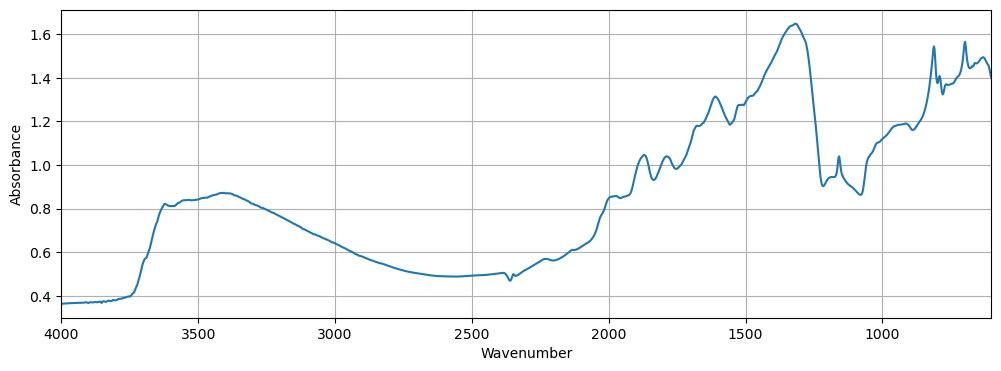

In [ ]:
fig, ax = plt.subplots(figsize=(12,4))
ax.set_xlim(np.max(wn), np.min(wn))
ax.set(xlabel='Wavenumber', ylabel='Absorbance')
ax.set_axisbelow(True)
ax.grid(True, which='both')
_ = ax.plot(wn, spectrum)

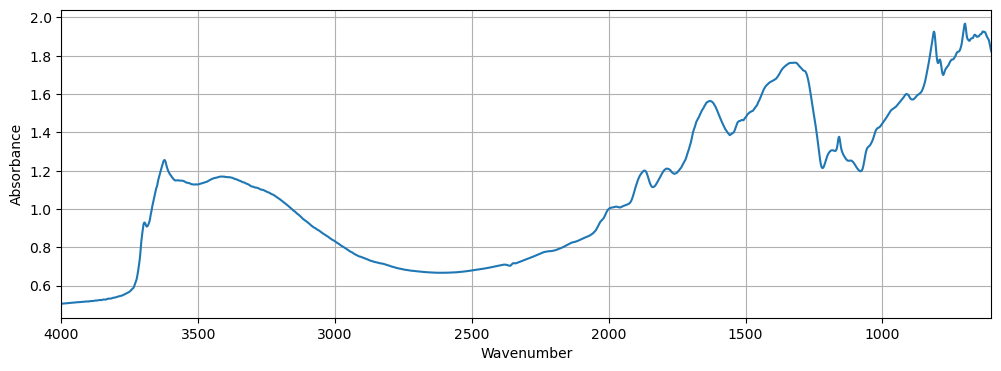

In [ ]:
fig, ax = plt.subplots(figsize=(12,4))
ax.set_xlim(np.max(wn), np.min(wn))
ax.set(xlabel='Wavenumber', ylabel='Absorbance')
ax.set_axisbelow(True)
ax.grid(True, which='both')
_ = ax.plot(wn, spectrum)

In [ ]:
def normalize(x):
    return x / np.max(np.abs(x))

In [ ]:
def snv(x):
    return (x - np.mean(x))/np.std(x)

Text(0.5, 1.0, 'Time-Frequency spectrogram of signal')

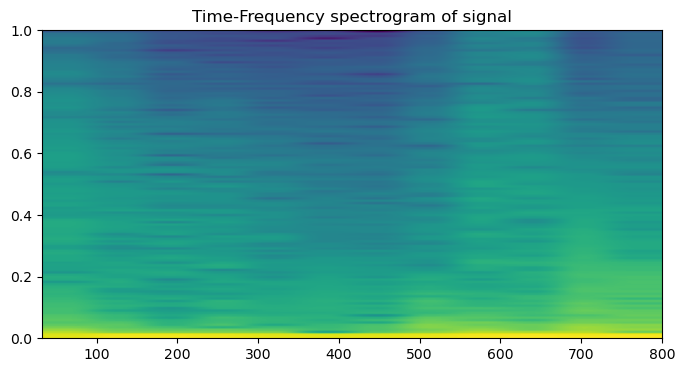

In [ ]:
plt.figure(figsize=(8, 4))
plt.specgram(normalize(spectrum))
plt.title("Time-Frequency spectrogram of signal")

In [ ]:
from kymatio.numpy import Scattering1D
from matplotlib import pyplot as plt, cm
from matplotlib import colors

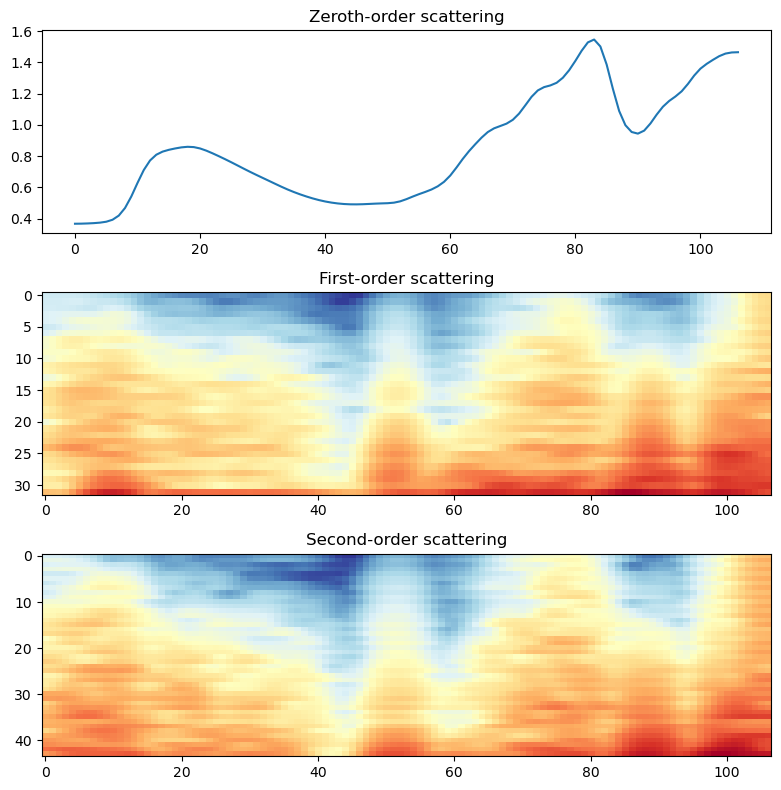

In [ ]:
J = 4
Q = 2**5
shape = 1700
T = None

scattering = Scattering1D(J, shape, Q, T)

meta = scattering.meta()
order0 = np.where(meta['order'] == 0)
order1 = np.where(meta['order'] == 1)
order2 = np.where(meta['order'] == 2)

#Sx = scattering(snv(spectrum))
Sx = scattering(spectrum)

plt.figure(figsize=(8, 8))
plt.subplot(3, 1, 1)
plt.plot(Sx[order0][0])
plt.title('Zeroth-order scattering')

plt.subplot(3, 1, 2)
#plt.imshow(Sx[order1], cmap=cm.RdYlBu_r, norm=colors.LogNorm(), aspect='auto')
plt.imshow(np.log10(Sx[order1]), cmap=cm.RdYlBu_r, aspect='auto')

plt.title('First-order scattering')
plt.subplot(3, 1, 3)
plt.imshow(Sx[order2], cmap=cm.RdYlBu_r, norm=colors.LogNorm(), aspect='auto')
plt.title('Second-order scattering')
plt.tight_layout()
plt.show()


In [ ]:
Sx[order1].shape

(32, 107)

In [ ]:
Sx[order2].shape

(44, 107)

In [ ]:
np.max(Sx[order1])

0.014955976323110437

In [ ]:
np.max(Sx[order2])

6.692997267828424e-05

In [ ]:
scales = np.arange(1, 2**7)
dt = 2
waveletname = 'cmor'

In [ ]:
#[coefficients, frequencies] = pywt.cwt(signal, scales, waveletname, dt)
[coefficients, frequencies] = pywt.cwt(snv(spectrum), scales, waveletname, dt)

In [ ]:
frequencies

array([0.25      , 0.125     , 0.08333333, 0.0625    , 0.05      ,
       0.04166667, 0.03571429, 0.03125   , 0.02777778, 0.025     ,
       0.02272727, 0.02083333, 0.01923077, 0.01785714, 0.01666667,
       0.015625  , 0.01470588, 0.01388889, 0.01315789, 0.0125    ,
       0.01190476, 0.01136364, 0.01086957, 0.01041667, 0.01      ,
       0.00961538, 0.00925926, 0.00892857, 0.00862069, 0.00833333,
       0.00806452, 0.0078125 , 0.00757576, 0.00735294, 0.00714286,
       0.00694444, 0.00675676, 0.00657895, 0.00641026, 0.00625   ,
       0.00609756, 0.00595238, 0.00581395, 0.00568182, 0.00555556,
       0.00543478, 0.00531915, 0.00520833, 0.00510204, 0.005     ,
       0.00490196, 0.00480769, 0.00471698, 0.00462963, 0.00454545,
       0.00446429, 0.00438596, 0.00431034, 0.00423729, 0.00416667,
       0.00409836, 0.00403226, 0.00396825, 0.00390625, 0.00384615,
       0.00378788, 0.00373134, 0.00367647, 0.00362319, 0.00357143,
       0.00352113, 0.00347222, 0.00342466, 0.00337838, 0.00333

In [ ]:
((abs(coefficients)) ** 2)[:4, :4]

array([[1.73020503e-01, 1.01171435e-02, 9.13060385e-06, 2.93087652e-07],
       [3.45791585e-01, 1.36788483e-01, 2.03978174e-02, 1.08638472e-03],
       [5.18378323e-01, 3.15641299e-01, 1.19495236e-01, 3.07945137e-02],
       [6.90788475e-01, 4.92423635e-01, 2.74693426e-01, 1.20302446e-01]])

<matplotlib.image.AxesImage>

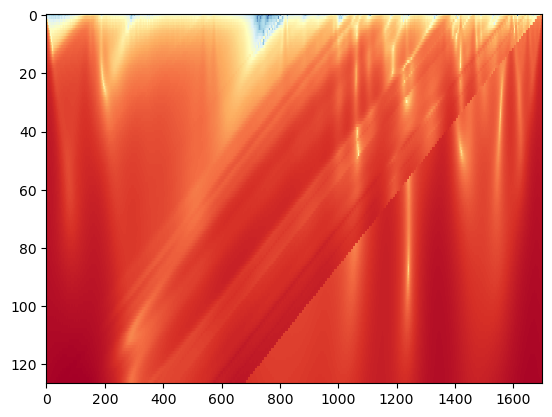

In [ ]:
plt.imshow((abs(coefficients)) ** 2, interpolation="nearest",
           cmap=cm.RdYlBu_r, norm=colors.LogNorm(), aspect='auto')

In [ ]:
1/0.25

4.0

In [ ]:
1/0.00396825

252.00025200025198

In [ ]:
np.min((abs(coefficients)) ** 2)

6.16064623061452e-11

In [ ]:
((abs(coefficients)) ** 2).shape

(127, 1700)

In [ ]:
np.arange(10,100,10)

array([10, 20, 30, 40, 50, 60, 70, 80, 90])

In [ ]:
np.percentile((abs(coefficients)) ** 2, np.arange(10,100,10))

array([0.01559214, 0.13828345, 0.34625443, 0.73786202, 1.19433138,
       1.72924306, 2.76353579, 4.85397685, 9.31247155])

In [ ]:
np.arange(4000, 600, -200)

array([4000, 3800, 3600, 3400, 3200, 3000, 2800, 2600, 2400, 2200, 2000,
       1800, 1600, 1400, 1200, 1000,  800])

In [ ]:
spectrum[::-1]

array([1.63990996, 1.6476458 , 1.65677654, ..., 0.3401283 , 0.33988185,
       0.33963842])

2


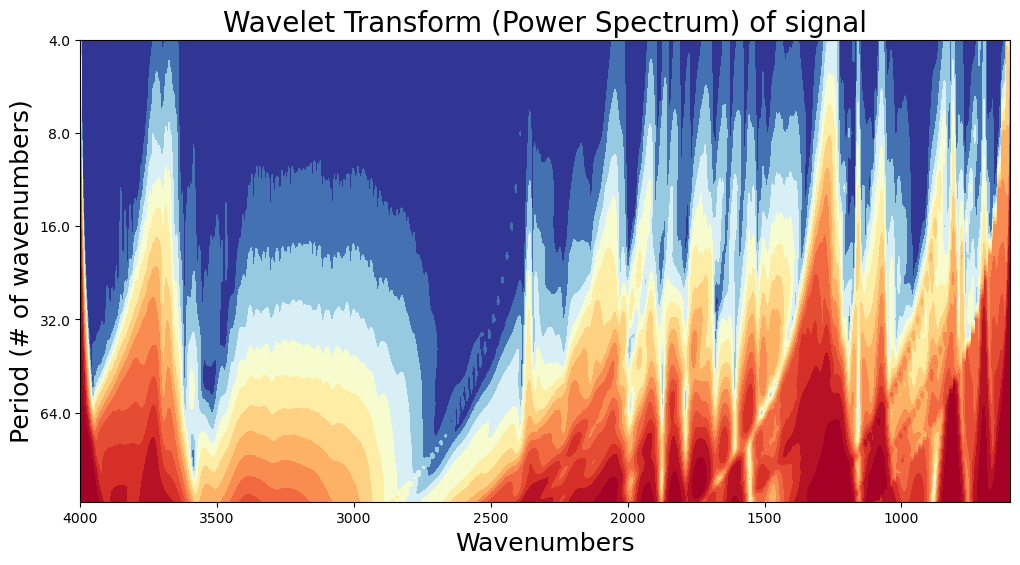

In [ ]:
def plot_wavelet(ax, time, signal, scales, waveletname = 'cmor', 
                 cmap = plt.cm.RdYlBu_r, title = '', ylabel = '', xlabel = ''):
    
    #dt = time[1] - time[0]
    dt = time[0] - time[1]
    print(dt)
    [coefficients, frequencies] = pywt.cwt(signal, scales, waveletname, dt)
    power = (abs(coefficients)) ** 2
    period = 1. / frequencies
    #levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8]
    #levels = [0.001, 0.01, 0.1, 0.25, 0.5, 1, 2, 4, 8, 10, 13]
    levels = np.percentile(power, np.arange(10,100,7))
    #levels = np.percentile(power, [25,50,75])
    contourlevels = np.log2(levels)
    
    im = ax.contourf(time, np.log2(period), np.log2(power), contourlevels, extend='both',cmap=cmap)
    #im = ax.contourf(time, np.log2(period), power, contourlevels, extend='both',cmap=cmap)
    
    ax.set_title(title, fontsize=20)
    ax.set_ylabel(ylabel, fontsize=18)
    ax.set_xlabel(xlabel, fontsize=18)
    yticks = 2**np.arange(np.ceil(np.log2(period.min())), np.ceil(np.log2(period.max())))
    ax.set_yticks(np.log2(yticks))
    #ax.set_xticks(np.arange(4000, 600, -200))
    ax.set_xlim(np.max(wn), np.min(wn))
    ax.set_yticklabels(yticks)
    ax.invert_yaxis()
    ylim = ax.get_ylim()
   # ax.set_ylim(ylim[0], -1)
    return yticks, ylim

scales = np.arange(1, 32)
#scales = np.arange(1, 256)
title = 'Wavelet Transform (Power Spectrum) of signal'
ylabel = 'Period (# of wavenumbers)'
xlabel = 'Wavenumbers'
#time = wn
time = wn
signal = snv(spectrum)

fig, ax = plt.subplots(figsize=(12, 6))

plot_wavelet(ax, time, signal, scales, xlabel=xlabel, ylabel=ylabel, title=title)
plt.show()


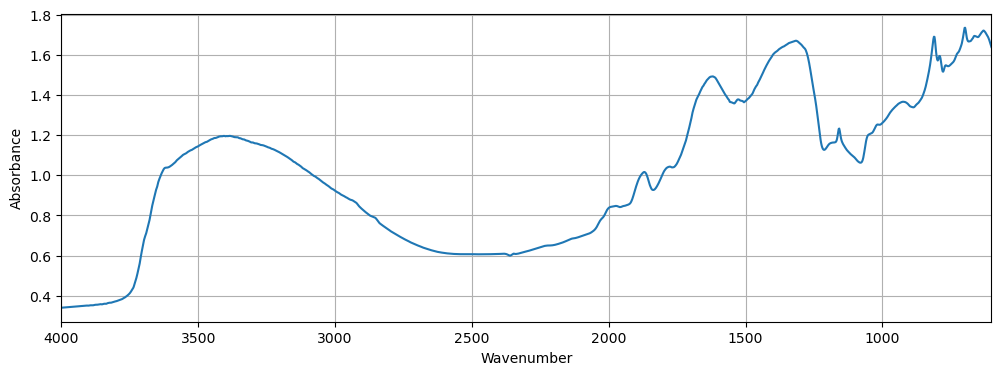

In [ ]:
fig, ax = plt.subplots(figsize=(12,4))
ax.set_xlim(np.max(wn), np.min(wn))
ax.set(xlabel='Wavenumber', ylabel='Absorbance')
ax.set_axisbelow(True)
ax.grid(True, which='both')
_ = ax.plot(wn, spectrum)

## Ataspinar

In [ ]:
import os
import pywt
#from wavelets.wave_python.waveletFunctions import *
import itertools
import numpy as np
import pandas as pd
from scipy.fftpack import fft
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches

### Load El-nino ds

In [ ]:
dataset = "https://raw.githubusercontent.com/taspinar/siml/master/datasets/sst_nino3.dat.txt"
df_nino = pd.read_table(dataset)
N = df_nino.shape[0] # N = 503
t0=1871
dt=0.25
time = np.arange(0, N) * dt + t0
signal = df_nino.values.squeeze()

In [ ]:
time[:10], signal[:10]

(array([1871.  , 1871.25, 1871.5 , 1871.75, 1872.  , 1872.25, 1872.5 ,
        1872.75, 1873.  , 1873.25]),
 array([-0.3 , -0.14, -0.41, -0.46, -0.66, -0.5 , -0.8 , -0.95, -0.72,
        -0.31]))

### Plot the el-Nino time-series dataset

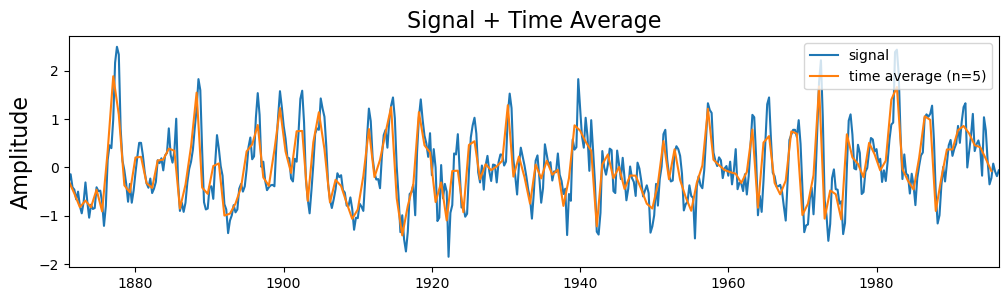

In [ ]:
# First lets load the el-Nino dataset, and plot it together with its time-average

def get_ave_values(xvalues, yvalues, n = 5):
    signal_length = len(xvalues)
    if signal_length % n == 0:
        padding_length = 0
    else:
        padding_length = n - signal_length//n % n
    xarr = np.array(xvalues)
    yarr = np.array(yvalues)
    xarr.resize(signal_length//n, n)
    yarr.resize(signal_length//n, n)
    xarr_reshaped = xarr.reshape((-1,n))
    yarr_reshaped = yarr.reshape((-1,n))
    x_ave = xarr_reshaped[:,0]
    y_ave = np.nanmean(yarr_reshaped, axis=1)
    return x_ave, y_ave

def plot_signal_plus_average(ax, time, signal, average_over = 5):
    time_ave, signal_ave = get_ave_values(time, signal, average_over)
    ax.plot(time, signal, label='signal')
    ax.plot(time_ave, signal_ave, label = 'time average (n={})'.format(5))
    ax.set_xlim([time[0], time[-1]])
    ax.set_ylabel('Amplitude', fontsize=16)
    ax.set_title('Signal + Time Average', fontsize=16)
    ax.legend(loc='upper right')

fig, ax = plt.subplots(figsize=(12,3))
plot_signal_plus_average(ax, time, signal, average_over = 3)
plt.show()

### Plot the Fourier Transform of the el-Nino dataset

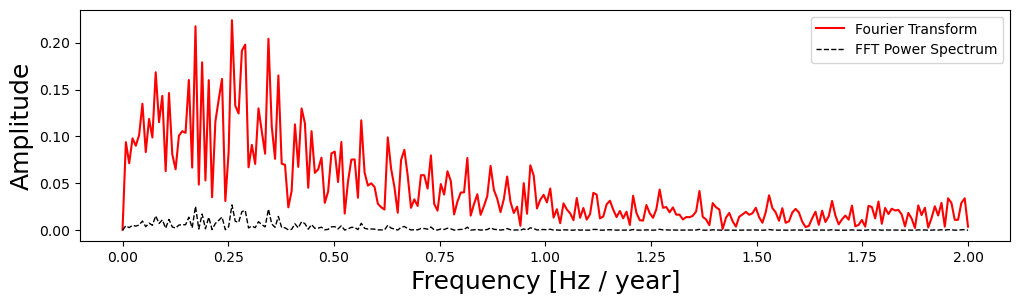

In [ ]:
def get_fft_values(y_values, T, N, f_s):
    N2 = 2 ** (int(np.log2(N)) + 1) # round up to next highest power of 2
    f_values = np.linspace(0.0, 1.0/(2.0*T), N2//2)
    fft_values_ = fft(y_values)
    fft_values = 2.0/N2 * np.abs(fft_values_[0:N2//2])
    return f_values, fft_values

def plot_fft_plus_power(ax, time, signal, plot_direction='horizontal', yticks=None, ylim=None):
    dt = time[1] - time[0]
    N = len(signal)
    fs = 1/dt
    
    variance = np.std(signal)**2
    f_values, fft_values = get_fft_values(signal, dt, N, fs)
    fft_power = variance * abs(fft_values) ** 2
    if plot_direction == 'horizontal':
        ax.plot(f_values, fft_values, 'r-', label='Fourier Transform')
        ax.plot(f_values, fft_power, 'k--', linewidth=1, label='FFT Power Spectrum')
    elif plot_direction == 'vertical':
        scales = 1./f_values
        scales_log = np.log2(scales)
        ax.plot(fft_values, scales_log, 'r-', label='Fourier Transform')
        ax.plot(fft_power, scales_log, 'k--', linewidth=1, label='FFT Power Spectrum')
        ax.set_yticks(np.log2(yticks))
        ax.set_yticklabels(yticks)
        ax.invert_yaxis()
        ax.set_ylim(ylim[0], -1)
    ax.legend()

fig, ax = plt.subplots(figsize=(12,3))
ax.set_xlabel('Frequency [Hz / year]', fontsize=18)
ax.set_ylabel('Amplitude', fontsize=18)
plot_fft_plus_power(ax, time, signal)
plt.show()


### Plot the Scaleogram using the Continuous Wavelet Transform

In [ ]:
2**7

128

In [ ]:
1/0.01574803

63.50000603250057

3.4903237209835746e-06
5.489321348168896


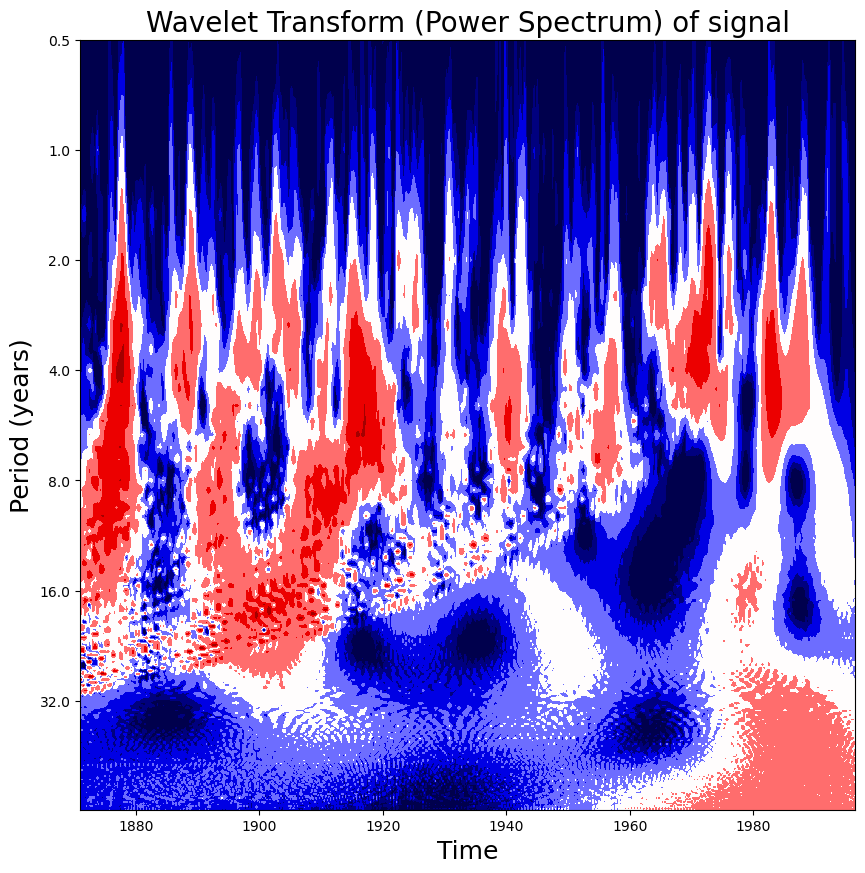

In [ ]:
def plot_wavelet(ax, time, signal, scales, waveletname = 'cmor', 
                 cmap = plt.cm.seismic, title = '', ylabel = '', xlabel = ''):
    
    dt = time[1] - time[0] # dt = 0.25 (1/4 year)
    [coefficients, frequencies] = pywt.cwt(signal, scales, waveletname, dt)
    power = (abs(coefficients)) ** 2
    period = 1. / frequencies
    print(np.min(power))
    print(np.max(power))
    levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8]
    contourlevels = np.log2(levels)
    
    im = ax.contourf(time, np.log2(period), np.log2(power), contourlevels, extend='both',cmap=cmap)
    
    ax.set_title(title, fontsize=20)
    ax.set_ylabel(ylabel, fontsize=18)
    ax.set_xlabel(xlabel, fontsize=18)
    
    yticks = 2**np.arange(np.ceil(np.log2(period.min())), np.ceil(np.log2(period.max())))
    ax.set_yticks(np.log2(yticks))
    ax.set_yticklabels(yticks)
    ax.invert_yaxis()
    ylim = ax.get_ylim()
    ax.set_ylim(ylim[0], -1)
    return yticks, ylim

scales = np.arange(1, 128)
title = 'Wavelet Transform (Power Spectrum) of signal'
ylabel = 'Period (years)'
xlabel = 'Time'

fig, ax = plt.subplots(figsize=(10, 10))
plot_wavelet(ax, time, signal, scales, xlabel=xlabel, ylabel=ylabel, title=title)
plt.show()


*Further link: http://nicolasfauchereau.github.io/climatecode/posts/wavelet-analysis-in-python/*

In [ ]:
len(t)

200

In [ ]:
cwtmatr.shape

(30, 200)

In [ ]:
widths

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

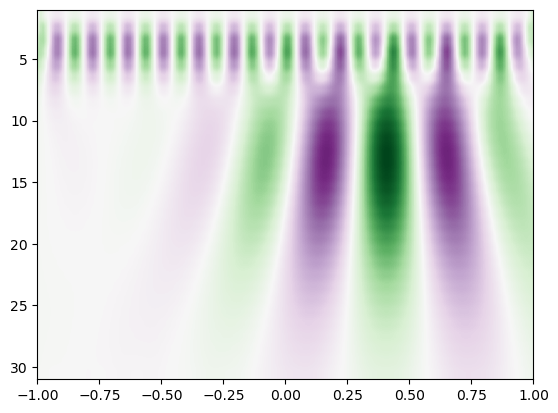

In [ ]:
from scipy import signal
t = np.linspace(-1, 1, 200, endpoint=False)
sig  = np.cos(2 * np.pi * 7 * t) + signal.gausspulse(t - 0.4, fc=2)
widths = np.arange(1, 31)
cwtmatr = signal.cwt(sig, signal.ricker, widths)
plt.imshow(cwtmatr, extent=[-1, 1, 31, 1], cmap='PRGn', aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.show()

In [ ]:
cwtmatr[:10, :10]

array([[ 0.12295729,  0.82403097,  0.49659403,  0.19313104,  0.01266223,
        -0.15155452, -0.28630701, -0.36655151, -0.37701453, -0.31570564],
       [ 0.69769974,  1.43730443,  1.60158153,  1.11979008,  0.29427449,
        -0.53783868, -1.17985036, -1.54401839, -1.59431904, -1.33594497],
       [ 1.34653365,  1.81454133,  1.83427207,  1.31321166,  0.35294568,
        -0.79468987, -1.82722383, -2.48941154, -2.63300254, -2.23432846],
       [ 1.55829543,  1.66283341,  1.41524402,  0.80161639, -0.09166864,
        -1.09108258, -1.9772139 , -2.54089853, -2.63684425, -2.21989958],
       [ 1.28947698,  1.14174398,  0.76883296,  0.20143702, -0.48129173,
        -1.16288311, -1.71163126, -2.00888631, -1.97679603, -1.59857087],
       [ 0.8480969 ,  0.62200371,  0.28279482, -0.13246614, -0.56759856,
        -0.95546568, -1.22957723, -1.33699074, -1.24982622, -0.97276712],
       [ 0.49754053,  0.30167726,  0.06043221, -0.19983502, -0.44719829,
        -0.64870469, -0.7756316 , -0.8085526 

In [ ]:
dt

0.005025125628140704

[<matplotlib.lines.Line2D>]

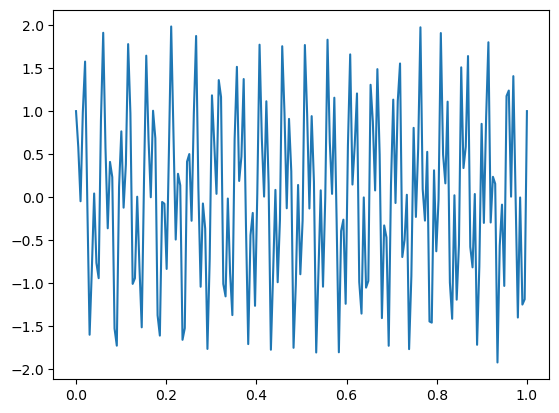

In [ ]:
plt.plot(t, sig)

In [ ]:
len(t)

200

In [ ]:
fs

199.0

In [ ]:
dt

0.005025125628140704

In [ ]:
freq

array([ 1.        ,  1.99494949,  2.98989899,  3.98484848,  4.97979798,
        5.97474747,  6.96969697,  7.96464646,  8.95959596,  9.95454545,
       10.94949495, 11.94444444, 12.93939394, 13.93434343, 14.92929293,
       15.92424242, 16.91919192, 17.91414141, 18.90909091, 19.9040404 ,
       20.8989899 , 21.89393939, 22.88888889, 23.88383838, 24.87878788,
       25.87373737, 26.86868687, 27.86363636, 28.85858586, 29.85353535,
       30.84848485, 31.84343434, 32.83838384, 33.83333333, 34.82828283,
       35.82323232, 36.81818182, 37.81313131, 38.80808081, 39.8030303 ,
       40.7979798 , 41.79292929, 42.78787879, 43.78282828, 44.77777778,
       45.77272727, 46.76767677, 47.76262626, 48.75757576, 49.75252525,
       50.74747475, 51.74242424, 52.73737374, 53.73232323, 54.72727273,
       55.72222222, 56.71717172, 57.71212121, 58.70707071, 59.7020202 ,
       60.6969697 , 61.69191919, 62.68686869, 63.68181818, 64.67676768,
       65.67171717, 66.66666667, 67.66161616, 68.65656566, 69.65

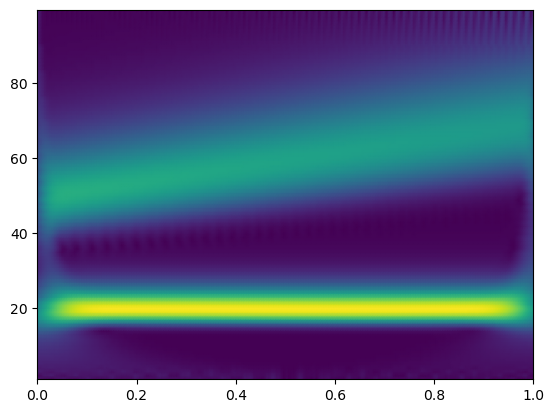

In [ ]:
from scipy import signal
import matplotlib.pyplot as plt
t, dt = np.linspace(0, 1, 200, retstep=True)
fs = 1/dt
w = 6.
sig = np.cos(2*np.pi*(50 + 10*t)*t) + np.sin(40*np.pi*t)
freq = np.linspace(1, fs/2, 100)
widths = w*fs / (2*freq*np.pi)
cwtm = signal.cwt(sig, signal.morlet2, widths, w=w)
plt.pcolormesh(t, freq, np.abs(cwtm), cmap='viridis', shading='gouraud')
plt.show()

In [ ]:
np.abs(cwtm)[:10, :10]

array([[0.18744164, 0.20062513, 0.11703488, 0.07163174, 0.0775973 ,
        0.03554493, 0.02856773, 0.10792761, 0.14714093, 0.14348223],
       [0.08562306, 0.07265478, 0.15033469, 0.19310775, 0.18768421,
        0.22914659, 0.23759628, 0.16311315, 0.13146667, 0.13379845],
       [0.23974719, 0.248407  , 0.20125464, 0.1755491 , 0.17826842,
        0.15498319, 0.14990963, 0.18751286, 0.20559065, 0.20384386],
       [0.20839428, 0.20410773, 0.2244174 , 0.23550478, 0.23403952,
        0.24405642, 0.24609482, 0.23040884, 0.22384401, 0.22341433],
       [0.26696741, 0.26850544, 0.26184166, 0.25790884, 0.25765872,
        0.2538669 , 0.25215056, 0.25456887, 0.25456314, 0.25300153],
       [0.29076522, 0.29026835, 0.29142122, 0.29160431, 0.29060412,
        0.2900641 , 0.2887611 , 0.28643723, 0.28429611, 0.2820332 ],
       [0.32594656, 0.32596036, 0.32518233, 0.32408507, 0.32270657,
        0.32078168, 0.31850851, 0.31588969, 0.31280837, 0.30934442],
       [0.36148645, 0.36137242, 0.3606634

In [ ]:
fname = 'files/32990XS01.0'
spectrum, wn = interp(read_opus(fname))

In [ ]:
len(wn)

1700

In [ ]:
dt = 2

In [ ]:
fs = 1/len(wn); fs

0.000588235294117647

In [ ]:
freq = np.linspace(1, fs/2, 100); freq

array([1.00000000e+00, 9.89901961e-01, 9.79803922e-01, 9.69705882e-01,
       9.59607843e-01, 9.49509804e-01, 9.39411765e-01, 9.29313725e-01,
       9.19215686e-01, 9.09117647e-01, 8.99019608e-01, 8.88921569e-01,
       8.78823529e-01, 8.68725490e-01, 8.58627451e-01, 8.48529412e-01,
       8.38431373e-01, 8.28333333e-01, 8.18235294e-01, 8.08137255e-01,
       7.98039216e-01, 7.87941176e-01, 7.77843137e-01, 7.67745098e-01,
       7.57647059e-01, 7.47549020e-01, 7.37450980e-01, 7.27352941e-01,
       7.17254902e-01, 7.07156863e-01, 6.97058824e-01, 6.86960784e-01,
       6.76862745e-01, 6.66764706e-01, 6.56666667e-01, 6.46568627e-01,
       6.36470588e-01, 6.26372549e-01, 6.16274510e-01, 6.06176471e-01,
       5.96078431e-01, 5.85980392e-01, 5.75882353e-01, 5.65784314e-01,
       5.55686275e-01, 5.45588235e-01, 5.35490196e-01, 5.25392157e-01,
       5.15294118e-01, 5.05196078e-01, 4.95098039e-01, 4.85000000e-01,
       4.74901961e-01, 4.64803922e-01, 4.54705882e-01, 4.44607843e-01,
      

In [ ]:
cwtmatr.shape

(30, 1700)

In [ ]:
cwtmatr[:10, :10]

array([[-1.98314721e-04,  1.94767401e-01,  7.53510762e-02,
         7.46358444e-03,  2.59024152e-04,  8.74542278e-05,
         1.09192379e-04, -1.56775100e-05, -2.25329388e-04,
        -2.12318986e-04],
       [-6.07201543e-04,  1.88661884e-01,  2.57612382e-01,
         2.04218157e-01,  1.11526023e-01,  4.42853615e-02,
         1.30270292e-02,  2.67831375e-03,  1.13672842e-04,
        -2.61823378e-04],
       [-1.08114598e-03,  1.62017879e-01,  2.74737795e-01,
         3.11676719e-01,  2.80776824e-01,  2.11870221e-01,
         1.37085753e-01,  7.69597370e-02,  3.77149333e-02,
         1.61863803e-02],
       [-1.64932332e-03,  1.42213342e-01,  2.60284688e-01,
         3.34262372e-01,  3.57976305e-01,  3.37367376e-01,
         2.86549564e-01,  2.22157145e-01,  1.58410270e-01,
         1.04410251e-01],
       [-2.36897946e-03,  1.27373637e-01,  2.42031165e-01,
         3.29345043e-01,  3.82106989e-01,  3.99015686e-01,
         3.84148144e-01,  3.45356250e-01,  2.92156979e-01,
         2.

<matplotlib.image.AxesImage>

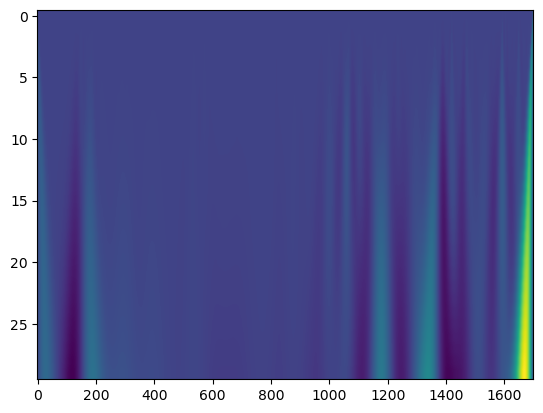

In [ ]:
from scipy import signal
#t = np.linspace(-1, 1, 200, endpoint=False)
#sig  = np.cos(2 * np.pi * 7 * t) + signal.gausspulse(t - 0.4, fc=2)
widths = np.arange(1, 31)
cwtmatr = signal.cwt(spectrum, signal.ricker, widths)
#plt.imshow(cwtmatr, extent=[-1, 1, 31, 1], cmap='PRGn', aspect='auto',
#           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
#plt.show()
#plt.pcolormesh(t, freq, np.abs(cwtm), cmap='viridis', shading='gouraud')

plt.imshow(cwtmatr, cmap='viridis', aspect='auto')

In [ ]:
import pywt

In [ ]:
np.logspace(np.log10(2), np.log10(100), 100)

array([  2.        ,   2.08061301,   2.16447524,   2.25171767,
         2.34247653,   2.43689357,   2.53511622,   2.63729789,
         2.74359815,   2.85418299,   2.96922513,   3.08890421,
         3.21340714,   3.34292834,   3.47767009,   3.61784281,
         3.7636654 ,   3.91536559,   4.07318028,   4.23735594,
         4.40814893,   4.585826  ,   4.77066461,   4.96295342,
         5.16299271,   5.37109489,   5.58758494,   5.81280095,
         6.04709463,   6.29083186,   6.54439329,   6.8081749 ,
         7.08258862,   7.368063  ,   7.66504385,   7.97399496,
         8.29539881,   8.62975732,   8.97759266,   9.33944802,
         9.71588851,  10.107502  ,  10.51490005,  10.9387189 ,
        11.37962041,  11.83829311,  12.3154533 ,  12.81184615,
        13.32824686,  13.86546188,  14.42433016,  15.00572446,
        15.61055274,  16.23975952,  16.89432743,  17.57527869,
        18.28367671,  19.02062777,  19.78728276,  20.58483892,
        21.41454179,  22.27768708,  23.17562273,  24.10

In [ ]:
len(x)

512

[<matplotlib.lines.Line2D>]

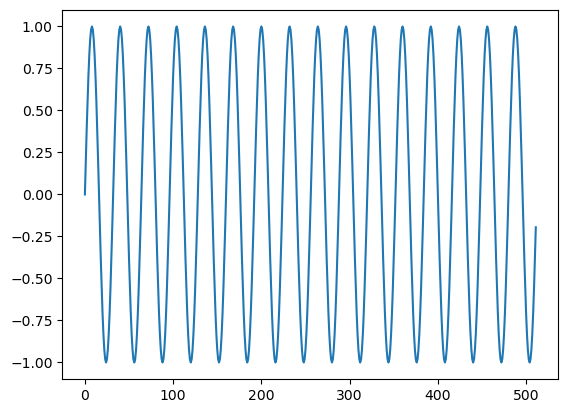

In [ ]:
plt.plot(x, y)

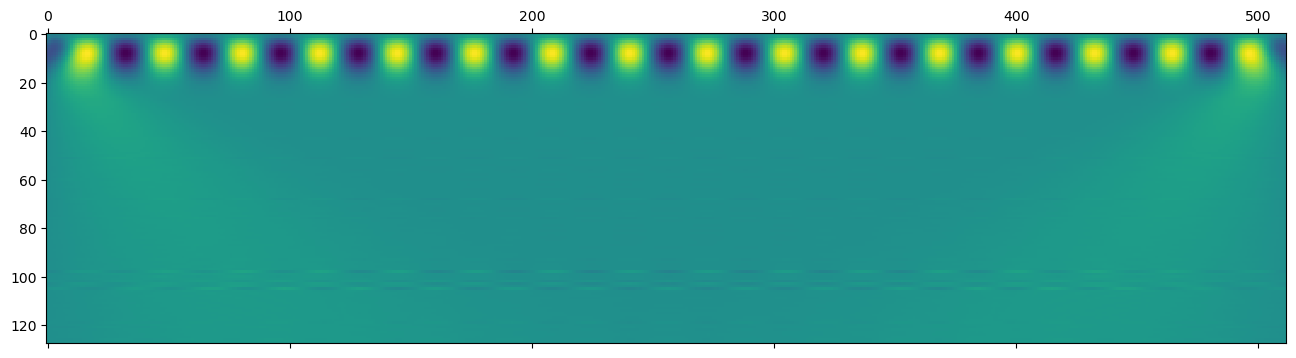

In [ ]:
import pywt
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(512)
y = np.sin(2*np.pi*x/32)
coef, freqs = pywt.cwt(y, np.arange(1,129),'gaus1')
plt.matshow(coef) 
plt.show() 

In [ ]:
pywt.central_frequency('cmor1-1.5')

1.5

In [ ]:
for family in pywt.families():
    print("%s family: " % family + ', '.join(pywt.wavelist(family)))

haar family: haar
db family: db1, db2, db3, db4, db5, db6, db7, db8, db9, db10, db11, db12, db13, db14, db15, db16, db17, db18, db19, db20, db21, db22, db23, db24, db25, db26, db27, db28, db29, db30, db31, db32, db33, db34, db35, db36, db37, db38
sym family: sym2, sym3, sym4, sym5, sym6, sym7, sym8, sym9, sym10, sym11, sym12, sym13, sym14, sym15, sym16, sym17, sym18, sym19, sym20
coif family: coif1, coif2, coif3, coif4, coif5, coif6, coif7, coif8, coif9, coif10, coif11, coif12, coif13, coif14, coif15, coif16, coif17
bior family: bior1.1, bior1.3, bior1.5, bior2.2, bior2.4, bior2.6, bior2.8, bior3.1, bior3.3, bior3.5, bior3.7, bior3.9, bior4.4, bior5.5, bior6.8
rbio family: rbio1.1, rbio1.3, rbio1.5, rbio2.2, rbio2.4, rbio2.6, rbio2.8, rbio3.1, rbio3.3, rbio3.5, rbio3.7, rbio3.9, rbio4.4, rbio5.5, rbio6.8
dmey family: dmey
gaus family: gaus1, gaus2, gaus3, gaus4, gaus5, gaus6, gaus7, gaus8
mexh family: mexh
morl family: morl
cgau family: cgau1, cgau2, cgau3, cgau4, cgau5, cgau6, cgau7, 

In [ ]:
coef.shape[1]

(849, 1700)

TypeError: Image data of dtype complex128 cannot be converted to float

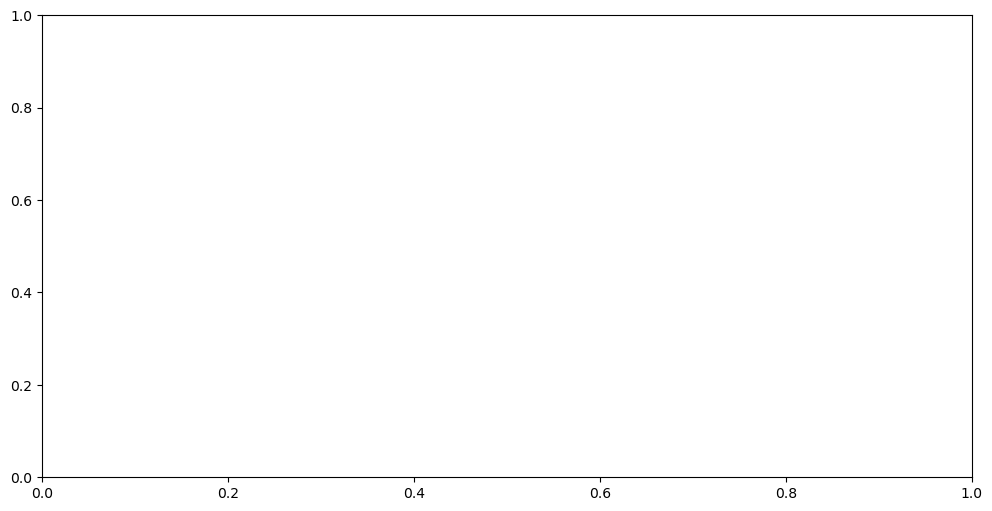

In [ ]:
coef, freqs = pywt.cwt(spectrum, np.arange(1,850),'cmor1.5-1.0')

fig, ax = plt.subplots(figsize=(12, 6))
#ax.set_xlim(np.max(wn), np.min(wn))
#ax.imshow(np.log(power), aspect='auto', extent=[600, 4000, 0, 100])
ax.imshow(coef, aspect='auto', extent=[600, 4000, 0, coef.shape[1]])
ax_twin = ax.twinx()
ax_twin.plot(wn, spectrum, c='w', lw=1)   

#plt.matshow(coef, aspect='auto') 
#plt.show() 

In [ ]:
def cwt(X, wavelet='cmor1-1.5'):
    periods = np.logspace(np.log10(2), np.log10(100), 100)
    #dt = 1
    dt = 2
    scales = (periods/dt) * pywt.central_frequency(wavelet)

    [coefficients, frequencies] = pywt.cwt(X, scales, wavelet, dt)
    power = (abs(coefficients)) ** 2
    #power = fun(coefficients)
    #period = 1. / frequencies
    #levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8]
    #contourlevels = np.log2(levels)
    return power

In [ ]:
power = cwt(spectrum); power

array([[6.52385551e-04, 2.58658447e-04, 1.77657721e-05, ...,
        1.38598527e-05, 4.69598983e-04, 6.18073480e-03],
       [5.55562134e-04, 1.05433383e-04, 3.79428889e-06, ...,
        9.74388434e-05, 2.40219072e-03, 1.28281629e-02],
       [3.29365934e-04, 3.34631103e-05, 6.48211556e-07, ...,
        7.31898799e-04, 7.46701370e-03, 1.65387178e-02],
       ...,
       [3.03262194e-02, 3.03178144e-02, 3.02725495e-02, ...,
        8.05434179e-01, 8.04337108e-01, 8.03514453e-01],
       [3.14923629e-02, 3.14767187e-02, 3.14319136e-02, ...,
        8.26376211e-01, 8.27318141e-01, 8.26843941e-01],
       [3.25596802e-02, 3.25535841e-02, 3.25053404e-02, ...,
        8.37646338e-01, 8.37922950e-01, 8.36781169e-01]])

In [ ]:
power.shape

(100, 1700)

[<matplotlib.lines.Line2D>]

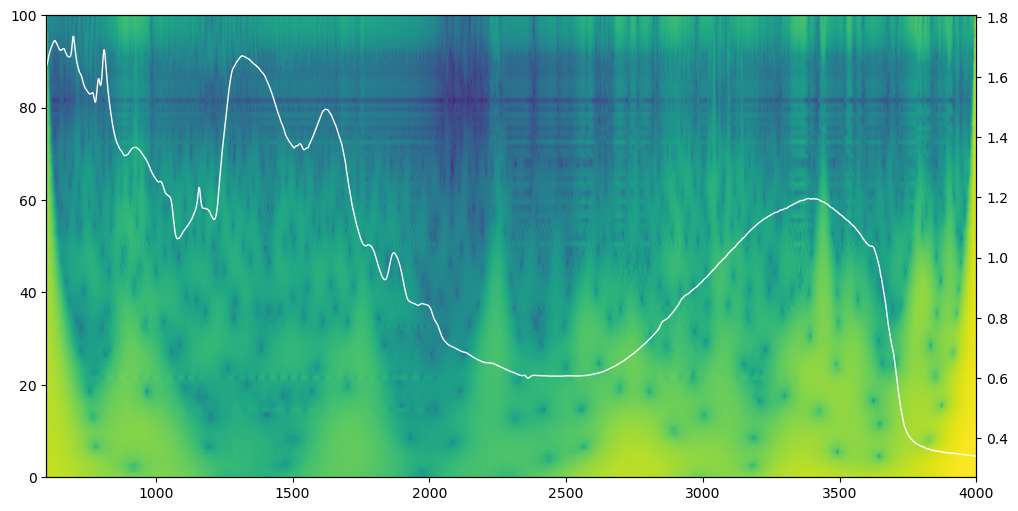

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
#ax.set_xlim(np.max(wn), np.min(wn))
ax.imshow(np.log(power), aspect='auto', extent=[600, 4000, 0, 100])
ax_twin = ax.twinx()
ax_twin.plot(wn, spectrum, c='w', lw=1)    
#ax.set_xlim(np.max(wn), np.min(wn))
#ax.set(xlabel='Wavenumber', ylabel='Absorbance')
#ax.set_axisbelow(True)
#ax.grid(True, which='both')
#_ = ax.plot(wn, spectrum)
#attr_plot = ax.imshow(attr_values, **barprops

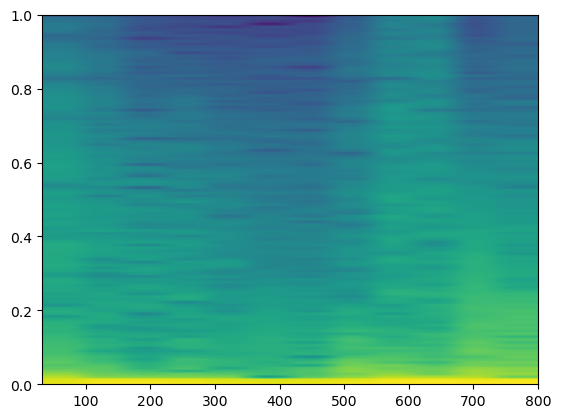

In [ ]:
plt.specgram(spectrum);

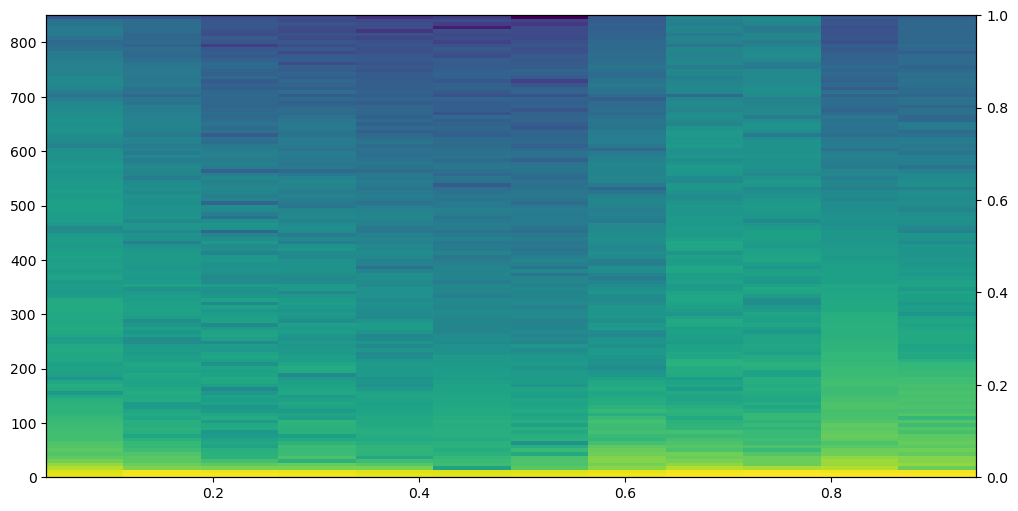

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
#ax.set_xlim(np.max(wn), np.min(wn))
#ax.imshow(np.log(power), aspect='auto', extent=[600, 4000, 0, 100])
ax.specgram(spectrum, Fs=1700);
ax_twin = ax.twinx()
#ax_twin.plot(wn, spectrum, c='w', lw=1)    